![Parked car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries, insurance is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance has requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to use simple Logistic Regression, identifying the single feature that results in the best-performing model, as measured by accuracy.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table (below) detailing the column names and descriptions below.

## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-25</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [84]:
# Import required libraries
library(readr)
library(dplyr)
library(glue)
library(yardstick)
library(ggplot2)
# Start coding!

In [85]:
#Load the csv fila
car_ensurance <- read_csv('car_insurance.csv')

#remove is column
car_ensurance <- car_ensurance %>%
					select(!id)
head(car_ensurance)

Rows: 10000 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (19): id, age, gender, race, driving_experience, education, income, cred...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,0,1,0,2,3,0.6290273,1,1,0,1,10238,12000,0,0,0,0,0
0,1,1,0,0,0,0.3577571,0,0,0,0,10238,16000,0,0,0,0,1
0,0,1,0,2,1,0.4931458,1,0,0,0,10238,11000,0,0,0,0,0
0,1,1,0,3,1,0.2060129,1,0,0,1,32765,11000,0,0,0,0,0
1,1,1,1,0,1,0.3883659,1,0,0,0,32765,12000,0,2,0,1,1
2,0,1,2,2,3,0.6191274,1,1,0,1,10238,13000,0,3,0,3,0


In [86]:
#look the structure of the data
str(car_ensurance)

tibble [10,000 × 18] (S3: tbl_df/tbl/data.frame)
 $ age                : num [1:10000] 3 0 0 0 1 2 3 1 2 2 ...
 $ gender             : num [1:10000] 0 1 0 1 1 0 1 0 0 0 ...
 $ race               : num [1:10000] 1 1 1 1 1 1 1 1 1 1 ...
 $ driving_experience : num [1:10000] 0 0 0 0 1 2 3 0 2 0 ...
 $ education          : num [1:10000] 2 0 2 3 0 2 2 3 3 2 ...
 $ income             : num [1:10000] 3 0 1 1 1 3 3 1 1 3 ...
 $ credit_score       : num [1:10000] 0.629 0.358 0.493 0.206 0.388 ...
 $ vehicle_ownership  : num [1:10000] 1 0 1 1 1 1 0 0 0 1 ...
 $ vehicle_year       : num [1:10000] 1 0 0 0 0 1 1 1 0 0 ...
 $ married            : num [1:10000] 0 0 0 0 0 0 1 0 1 0 ...
 $ children           : num [1:10000] 1 0 0 1 0 1 1 1 0 1 ...
 $ postal_code        : num [1:10000] 10238 10238 10238 32765 32765 ...
 $ annual_mileage     : num [1:10000] 12000 16000 11000 11000 12000 13000 13000 14000 13000 11000 ...
 $ vehicle_type       : num [1:10000] 0 0 0 0 0 0 0 0 0 0 ...
 $ speeding_violations:

In [87]:
#Look if ther are null values
missing_values <- colSums(is.na(car_ensurance))
print(missing_values)#annual_milage and credit_Score columns have missing values

                age              gender                race  driving_experience 
                  0                   0                   0                   0 
          education              income        credit_score   vehicle_ownership 
                  0                   0                 982                   0 
       vehicle_year             married            children         postal_code 
                  0                   0                   0                   0 
     annual_mileage        vehicle_type speeding_violations                duis 
                957                   0                   0                   0 
     past_accidents             outcome 
                  0                   0 


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 982 rows containing non-finite outside the scale range (`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 957 rows containing non-finite outside the scale range (`stat_bin()`).”


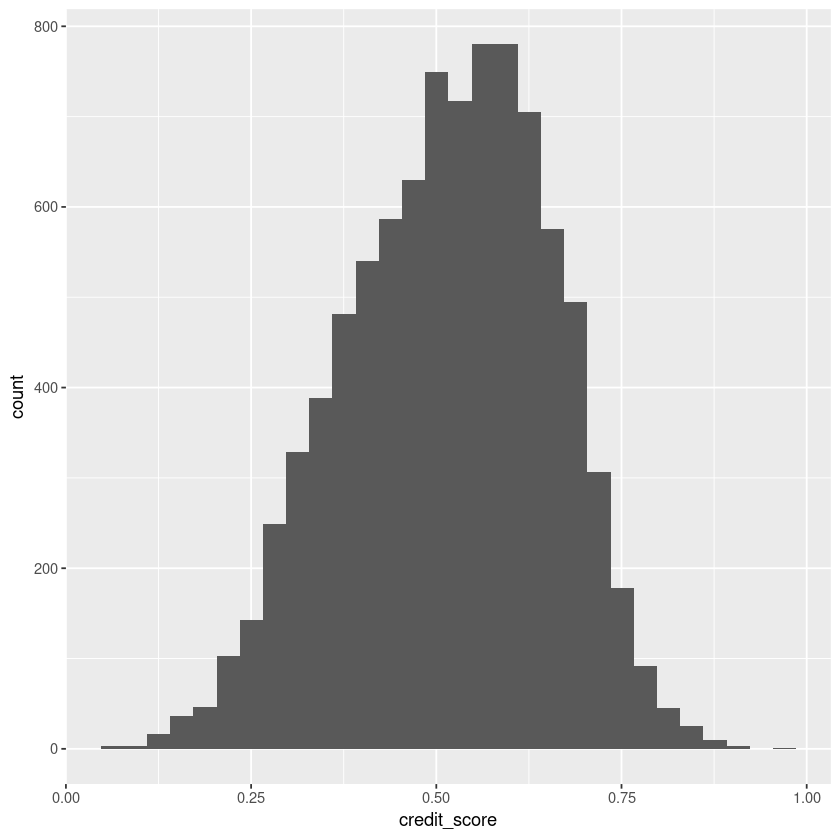

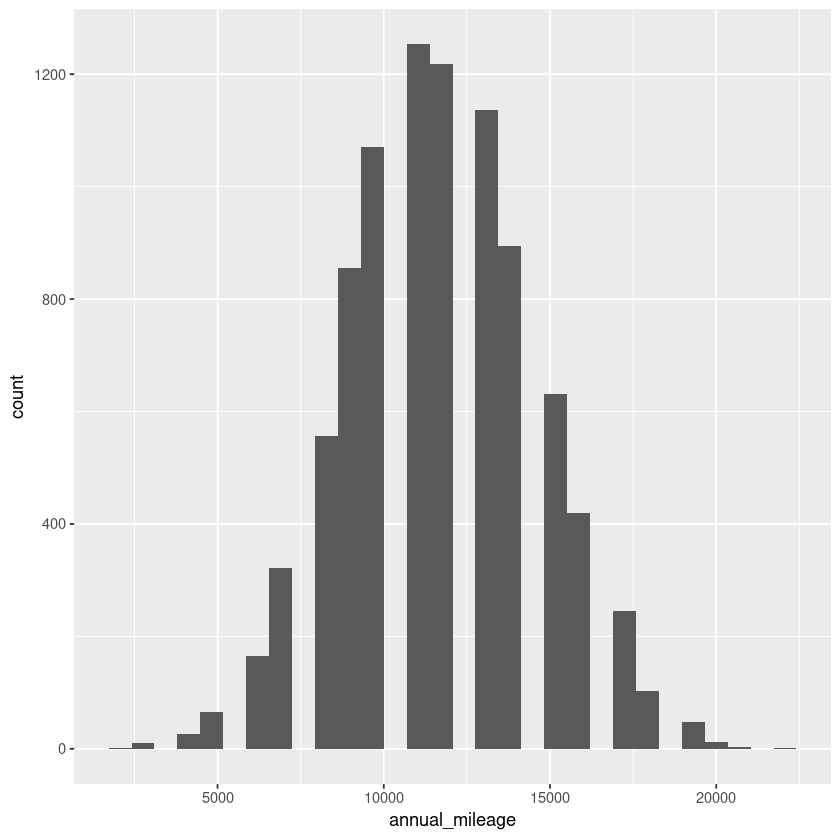

In [88]:
#lets look the distribution of both columns
ggplot(car_ensurance, aes(credit_score)) +
	geom_histogram()
ggplot(car_ensurance, aes(annual_mileage)) +
	geom_histogram()

In [89]:
#Fill the missing values with the mean of the column
car_ensurance$credit_score[is.na(car_ensurance$credit_score)] <- mean(car_ensurance$credit_score, na.rm = TRUE)

car_ensurance$annual_mileage[is.na(car_ensurance$annual_mileage)] <- mean(car_ensurance$annual_mileage, na.rm = TRUE)

#Lets check missing values
print(colSums(is.na(car_ensurance)))

                age              gender                race  driving_experience 
                  0                   0                   0                   0 
          education              income        credit_score   vehicle_ownership 
                  0                   0                   0                   0 
       vehicle_year             married            children         postal_code 
                  0                   0                   0                   0 
     annual_mileage        vehicle_type speeding_violations                duis 
                  0                   0                   0                   0 
     past_accidents             outcome 
                  0                   0 


In [90]:
#Find the feature with the best predictive performance for a car ensurance claim by Logistic regression
#colect all the feature columns
features_df <- tibble(car_ensurance %>%
			select(-outcome) %>%
			names())
colnames(features_df)[1] <- "features"
str(features_df)
#loop for the features
i <- 0
for (col in features_df$features){
	i <- i + 1
	#fitting the model
	model <- glm(glue('outcome ~ {col}'), data = car_ensurance, family = 'binomial')
	#make prediction
	predictions <- round(fitted(model))
	#computing accuracy
	accuracy <- length(which(car_ensurance$outcome == predictions))/length(car_ensurance$outcome)

	features_df[i, "accuracy"] = accuracy
}

print(features_df)

tibble [17 × 1] (S3: tbl_df/tbl/data.frame)
 $ features: chr [1:17] "age" "gender" "race" "driving_experience" ...
# A tibble: 17 × 2
   features            accuracy
   <chr>                  <dbl>
 1 age                    0.775
 2 gender                 0.687
 3 race                   0.687
 4 driving_experience     0.777
 5 education              0.687
 6 income                 0.742
 7 credit_score           0.705
 8 vehicle_ownership      0.735
 9 vehicle_year           0.687
10 married                0.687
11 children               0.687
12 postal_code            0.687
13 annual_mileage         0.690
14 vehicle_type           0.687
15 speeding_violations    0.687
16 duis                   0.687
17 past_accidents         0.687


In [91]:
#best feature
best_feature <- features_df$features[which.max(features_df$accuracy)]
best_feature

#best accuracy
best_accuracy = max(features_df$accuracy)
best_accuracy

#Lets join both values in a df

best_feature_df <- data.frame(best_feature = best_feature, best_accuracy = best_accuracy)
best_feature_df

[1] "driving_experience"

[1] 0.7771

best_feature,best_accuracy
<chr>,<dbl>
driving_experience,0.7771
